<a href="https://colab.research.google.com/github/YiyoMb/extraccion-conocimiento-bd/blob/main/notebooks/05_modelo_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Librerías importadas para análisis de asociación
✅ Datos cargados: (541909, 8)

📝 1. JUSTIFICACIÓN DEL ALGORITMO DE ASOCIACIÓN

ALGORITMO SELECCIONADO: APRIORI ALGORITHM

✅ JUSTIFICACIÓN PARA MARKET BASKET ANALYSIS:

VENTAJAS DEL ALGORITMO APRIORI:
• Encuentra patrones frecuentes de compra (itemsets frecuentes)
• Genera reglas de asociación interpretables
• Maneja eficientemente datasets transaccionales grandes
• Implementación robusta y ampliamente validada
• Permite control de parámetros (soporte, confianza, lift)

✅ APLICACIÓN EN RETAIL:
• Identifica productos que se compran juntos frecuentemente
• Optimiza disposición de productos en tienda
• Estrategias de cross-selling y up-selling
• Recomendaciones de productos
• Optimización de inventario

✅ MÉTRICAS CLAVE:
• SOPORTE: Frecuencia de aparición del itemset en transacciones
• CONFIANZA: Probabilidad de comprar Y dado que se compró X
• LIFT: Medida de independencia (>1 indica asociación positiva)
• CONVICCIÓN: Medida de implicació

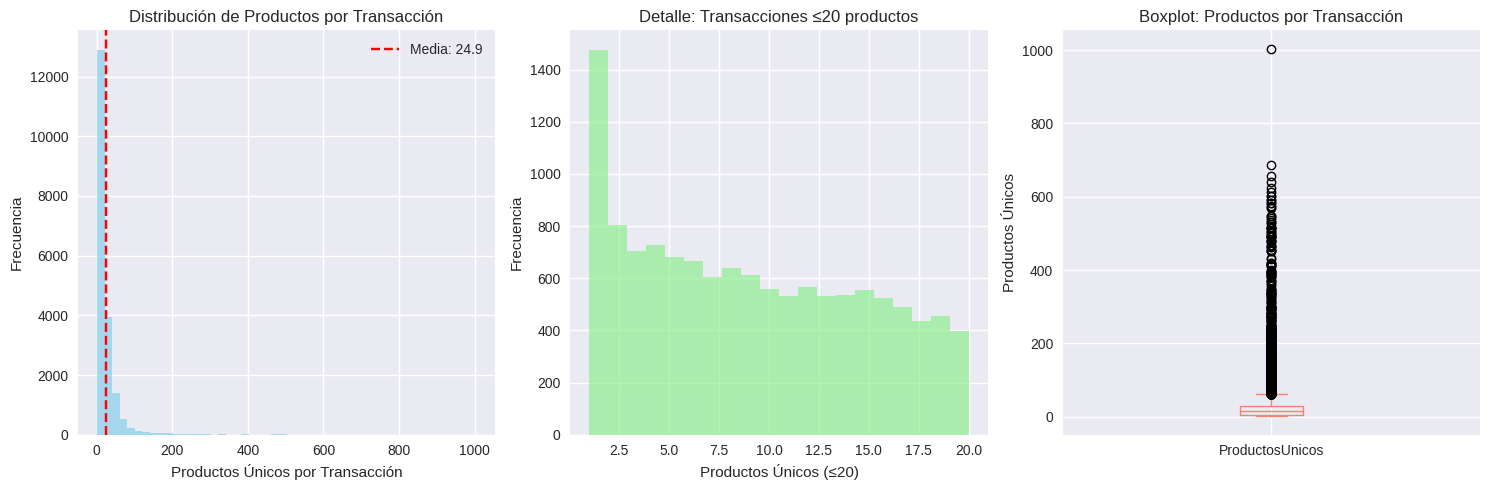


🏪 3. CREACIÓN DE MATRIZ TRANSACCIONAL
📊 Total de transacciones para análisis: 19,576

📝 EJEMPLOS DE TRANSACCIONES:
  1. [7 productos] WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN, CREAM CUPID HEARTS COAT HANGER ... (+4 más)
  2. [1 productos] HAND WARMER UNION JACK
  3. [11 productos] ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN ... (+8 más)
  4. [4 productos] JAM MAKING SET WITH JARS, RED COAT RACK PARIS FASHION, YELLOW COAT RACK PARIS FASHION ... (+1 más)
  5. [1 productos] BATH BUILDING BLOCK WORD
📊 Transacciones después de filtrar tamaño (2-50 productos): 16,062
✅ Matriz transaccional creada: (16062, 2194)
📊 Productos únicos en matriz: 2194
📊 Densidad de la matriz: 0.756% (productos por transacción)

🔍 4. ANÁLISIS DE ITEMSETS FRECUENTES
📊 Soporte mínimo configurado: 0.01 (161 transacciones)
🔄 Ejecutando algoritmo Apriori...
Processing 476 combinations | Sampling itemset size 4
✅ Itemsets frecuentes encontrados: 682

📊 DISTRIBUCIÓN 

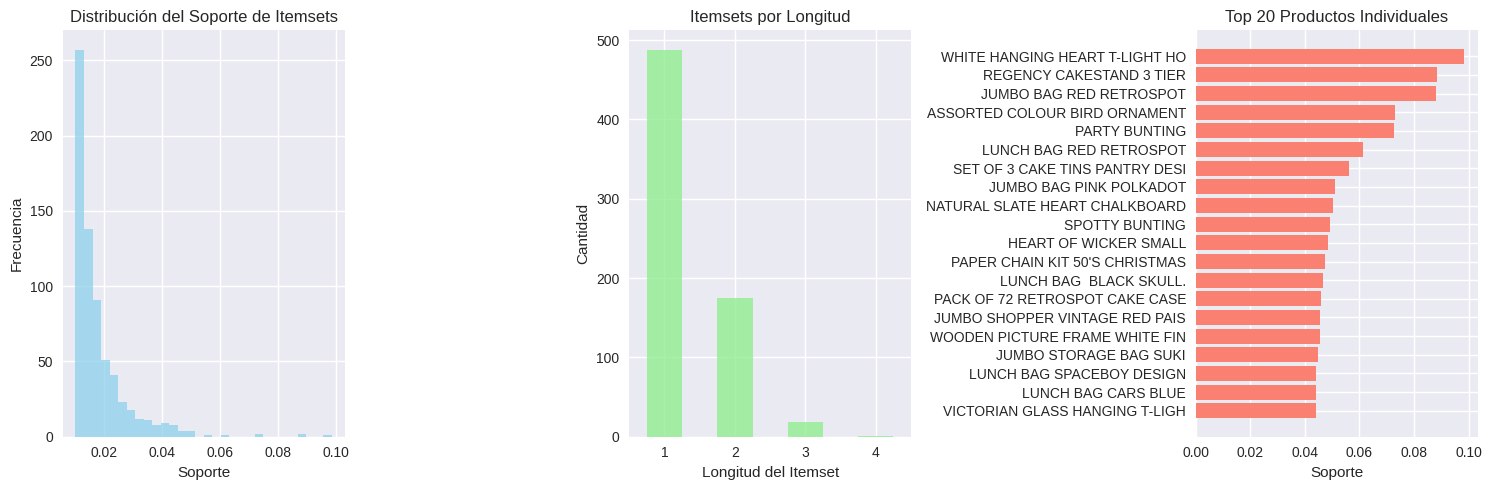


📋 5. GENERACIÓN DE REGLAS DE ASOCIACIÓN
📊 Parámetros configurados:
  • Confianza mínima: 0.3
  • Lift mínimo: 1.2
🔄 Generando reglas de asociación...
✅ Reglas de asociación generadas: 320

📊 ESTADÍSTICAS DE REGLAS:
  • Confianza promedio: 0.488
  • Lift promedio: 14.127
  • Convicción promedio: 2.160

📊 6. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS
🎯 CRITERIO DE ANÁLISIS 1: ANÁLISIS DE REGLAS POR MÉTRICAS

🏆 TOP 10 REGLAS POR LIFT (ASOCIACIÓN MÁS FUERTE):
   1. [REGENCY SUGAR BOWL GREEN] → [REGENCY MILK JUG PINK]
      Lift: 57.23, Conf: 0.78, Soporte: 0.010
   2. [REGENCY MILK JUG PINK] → [REGENCY SUGAR BOWL GREEN]
      Lift: 57.23, Conf: 0.76, Soporte: 0.010
   3. [POPPY'S PLAYHOUSE BEDROOM] → [POPPY'S PLAYHOUSE KITCHEN]
      Lift: 53.98, Conf: 0.78, Soporte: 0.010
   4. [POPPY'S PLAYHOUSE KITCHEN] → [POPPY'S PLAYHOUSE BEDROOM]
      Lift: 53.98, Conf: 0.71, Soporte: 0.010
   5. [REGENCY TEA PLATE GREEN] → [REGENCY TEA PLATE ROSES]
      Lift: 53.32, Conf: 0.86, Soporte: 0.011

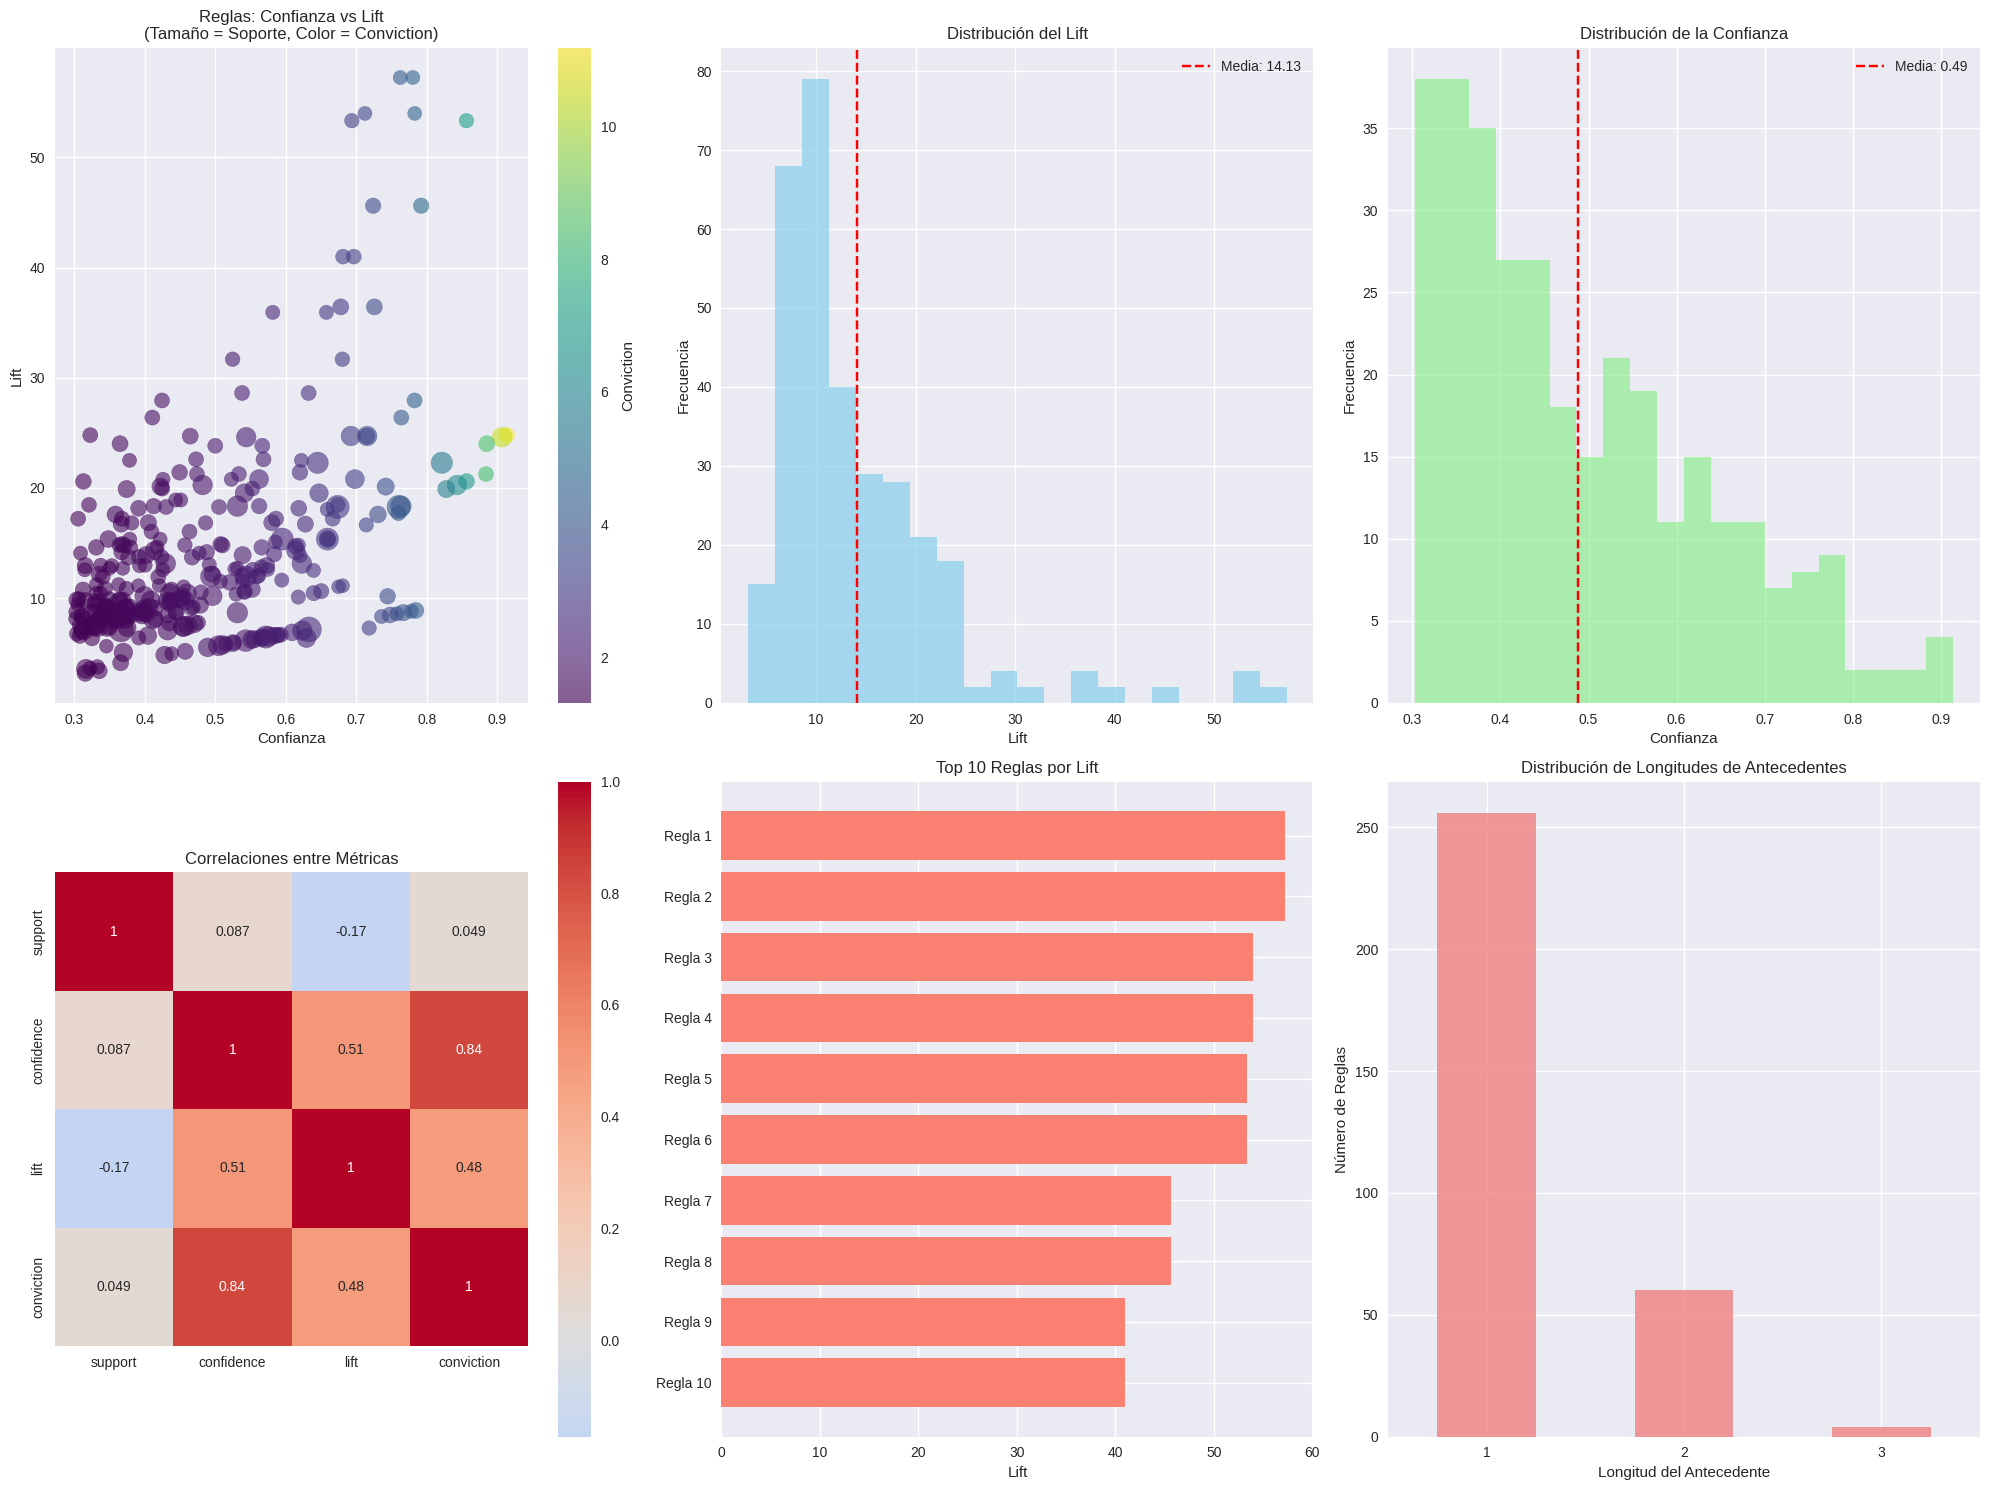


🕸️ 8. ANÁLISIS DE REDES DE ASOCIACIÓN
🔄 Creando red de asociaciones...
✅ Red creada con 19 nodos y 20 aristas


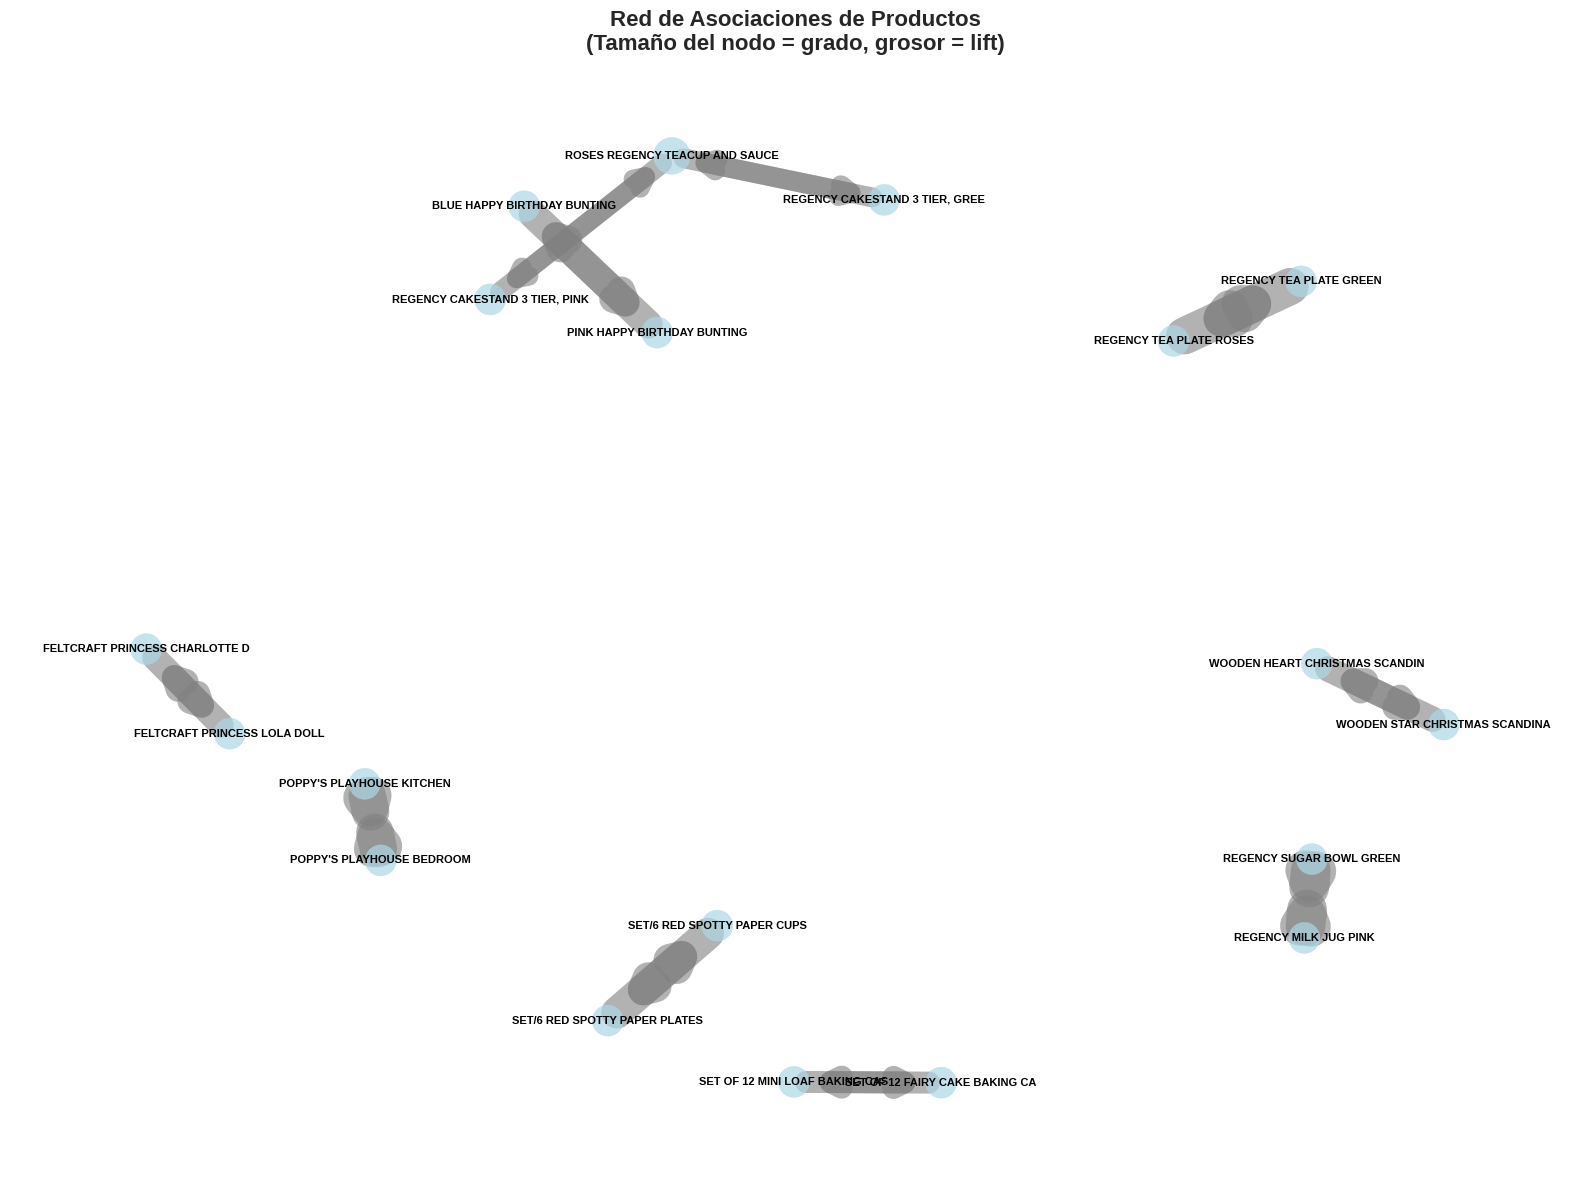


💾 9. GUARDADO DE RESULTADOS
✅ Resultados guardados exitosamente:
  • frequent_itemsets.csv
  • association_rules.csv
  • transaction_encoder.pkl
  • association_info.json

🏢 10. INTERPRETACIÓN EMPRESARIAL DE REGLAS
💼 APLICACIONES EMPRESARIALES DE LAS REGLAS ENCONTRADAS:

🛍️ ESTRATEGIAS DE CROSS-SELLING:

  1. REGLA: Si cliente compra [REGENCY SUGAR BOWL GREEN...]
     ENTONCES: Recomendar [REGENCY MILK JUG PINK...]
     • Probabilidad de éxito: 78.0%
     • Fuerza de asociación: 57.2x más probable
     • Aplicable a: 167 transacciones tipo

  2. REGLA: Si cliente compra [REGENCY MILK JUG PINK...]
     ENTONCES: Recomendar [REGENCY SUGAR BOWL GREEN...]
     • Probabilidad de éxito: 76.3%
     • Fuerza de asociación: 57.2x más probable
     • Aplicable a: 167 transacciones tipo

  3. REGLA: Si cliente compra [POPPY'S PLAYHOUSE BEDROOM...]
     ENTONCES: Recomendar [POPPY'S PLAYHOUSE KITCHEN...]
     • Probabilidad de éxito: 78.3%
     • Fuerza de asociación: 54.0x más probable
     • Ap

In [2]:
# ==============================================================================
# MODELO DE ASOCIACIÓN - MARKET BASKET ANALYSIS
# Proyecto: Extracción de Conocimiento en Bases de Datos
# Criterio DE - Aprendizaje No Supervisado
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("✅ Librerías importadas para análisis de asociación")

# ==============================================================================
# CARGA Y PREPARACIÓN DE DATOS
# ==============================================================================

def cargar_datos():
    """Función para cargar datos básicos"""
    import urllib.request
    import os

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    filename = "Online_Retail.xlsx"

    if not os.path.exists('datos'):
        os.makedirs('datos')

    if not os.path.exists(f'datos/{filename}'):
        print("📥 Descargando dataset...")
        urllib.request.urlretrieve(url, f'datos/{filename}')

    df = pd.read_excel(f'datos/{filename}')
    return df

# Cargar datos
df = cargar_datos()
print(f"✅ Datos cargados: {df.shape}")

# ==============================================================================
# 1. JUSTIFICACIÓN DEL ALGORITMO DE ASOCIACIÓN
# ==============================================================================

print("\n" + "="*60)
print("📝 1. JUSTIFICACIÓN DEL ALGORITMO DE ASOCIACIÓN")
print("="*60)

justificacion_asociacion = """
ALGORITMO SELECCIONADO: APRIORI ALGORITHM

✅ JUSTIFICACIÓN PARA MARKET BASKET ANALYSIS:

VENTAJAS DEL ALGORITMO APRIORI:
• Encuentra patrones frecuentes de compra (itemsets frecuentes)
• Genera reglas de asociación interpretables
• Maneja eficientemente datasets transaccionales grandes
• Implementación robusta y ampliamente validada
• Permite control de parámetros (soporte, confianza, lift)

✅ APLICACIÓN EN RETAIL:
• Identifica productos que se compran juntos frecuentemente
• Optimiza disposición de productos en tienda
• Estrategias de cross-selling y up-selling
• Recomendaciones de productos
• Optimización de inventario

✅ MÉTRICAS CLAVE:
• SOPORTE: Frecuencia de aparición del itemset en transacciones
• CONFIANZA: Probabilidad de comprar Y dado que se compró X
• LIFT: Medida de independencia (>1 indica asociación positiva)
• CONVICCIÓN: Medida de implicación (qué tan dependiente es la regla)

✅ PARÁMETROS SELECCIONADOS:
• Soporte mínimo: 0.01 (1% de transacciones)
• Confianza mínima: 0.3 (30% de probabilidad)
• Lift mínimo: 1.2 (asociación positiva significativa)

✅ COMPARACIÓN CON ALTERNATIVAS:
• FP-Growth: Más eficiente pero menos interpretable
• Eclat: Bueno para itemsets pero no genera reglas directamente
• Apriori: Balance óptimo entre eficiencia e interpretabilidad

OBJETIVO: Descubrir patrones de compra para estrategias de marketing
y optimización de ventas cruzadas.
"""

print(justificacion_asociacion)

# ==============================================================================
# 2. PREPROCESAMIENTO PARA MARKET BASKET ANALYSIS
# ==============================================================================

print("\n" + "="*60)
print("🔧 2. PREPROCESAMIENTO PARA MARKET BASKET ANALYSIS")
print("="*60)

# Filtrar datos válidos
df_mba = df.copy()
df_mba = df_mba.dropna(subset=['Description', 'InvoiceNo'])
df_mba = df_mba[(df_mba['Quantity'] > 0) & (df_mba['UnitPrice'] > 0)]


print(f"📊 Datos después de filtros básicos: {df_mba.shape}")

# Limpiar descripciones de productos
df_mba['Description'] = df_mba['Description'].str.strip().str.upper()

# Filtrar productos válidos (eliminar códigos especiales, devoluciones, etc.)
# Asegurar que las columnas sean tipo string para poder usar .str.contains()
df_mba['StockCode'] = df_mba['StockCode'].astype(str)
df_mba['InvoiceNo'] = df_mba['InvoiceNo'].astype(str)
# Excluir códigos que empiecen con letras que indican servicios o devoluciones
df_mba = df_mba[~df_mba['StockCode'].str.contains('^[A-Z]+', regex=True, na=False)]
df_mba = df_mba[~df_mba['InvoiceNo'].str.contains('^C', na=False)]  # Eliminar cancelaciones

print(f"📊 Datos después de filtrar productos válidos: {df_mba.shape}")

# Análisis de frecuencia de productos
product_frequency = df_mba['Description'].value_counts()
print(f"\n📊 Total de productos únicos: {len(product_frequency)}")
print(f"📊 Top 10 productos más vendidos:")
for i, (producto, freq) in enumerate(product_frequency.head(10).items(), 1):
    print(f"  {i:2d}. {producto[:50]:<50} ({freq:,} unidades)")

# Filtrar productos por frecuencia (eliminar productos muy raros)
min_frequency = 50  # Producto debe aparecer al menos 50 veces
productos_frecuentes = product_frequency[product_frequency >= min_frequency].index
df_mba = df_mba[df_mba['Description'].isin(productos_frecuentes)]

print(f"\n📊 Productos después de filtrar por frecuencia (≥{min_frequency}): {len(productos_frecuentes)}")
print(f"📊 Transacciones finales: {df_mba.shape}")

# Análisis de transacciones
transacciones_stats = df_mba.groupby('InvoiceNo').agg({
    'Description': 'nunique',
    'Quantity': 'sum',
    'StockCode': 'nunique'
}).rename(columns={
    'Description': 'ProductosUnicos',
    'Quantity': 'CantidadTotal',
    'StockCode': 'CodigosUnicos'
})

print(f"\n📊 ESTADÍSTICAS DE TRANSACCIONES:")
print(f"  • Total de facturas únicas: {len(transacciones_stats):,}")
print(f"  • Productos por transacción (promedio): {transacciones_stats['ProductosUnicos'].mean():.1f}")
print(f"  • Productos por transacción (mediana): {transacciones_stats['ProductosUnicos'].median():.1f}")
print(f"  • Cantidad por transacción (promedio): {transacciones_stats['CantidadTotal'].mean():.1f}")

# Visualizar distribución de productos por transacción
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(transacciones_stats['ProductosUnicos'], bins=50, alpha=0.7, color='skyblue')
plt.axvline(transacciones_stats['ProductosUnicos'].mean(), color='red', linestyle='--',
           label=f'Media: {transacciones_stats["ProductosUnicos"].mean():.1f}')
plt.xlabel('Productos Únicos por Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Productos por Transacción')
plt.legend()

plt.subplot(1, 3, 2)
# Zoom para transacciones con ≤20 productos
subset = transacciones_stats[transacciones_stats['ProductosUnicos'] <= 20]['ProductosUnicos']
plt.hist(subset, bins=20, alpha=0.7, color='lightgreen')
plt.xlabel('Productos Únicos (≤20)')
plt.ylabel('Frecuencia')
plt.title('Detalle: Transacciones ≤20 productos')

plt.subplot(1, 3, 3)
transacciones_stats['ProductosUnicos'].plot(kind='box', color='salmon')
plt.ylabel('Productos Únicos')
plt.title('Boxplot: Productos por Transacción')

plt.tight_layout()
plt.show()

# ==============================================================================
# 3. CREACIÓN DE MATRIZ TRANSACCIONAL
# ==============================================================================

print("\n" + "="*60)
print("🏪 3. CREACIÓN DE MATRIZ TRANSACCIONAL")
print("="*60)

# Crear lista de transacciones (cada transacción = lista de productos)
transacciones = df_mba.groupby('InvoiceNo')['Description'].apply(list).values

print(f"📊 Total de transacciones para análisis: {len(transacciones):,}")

# Mostrar ejemplos de transacciones
print(f"\n📝 EJEMPLOS DE TRANSACCIONES:")
for i, transaccion in enumerate(transacciones[:5], 1):
    productos_str = ', '.join(transaccion[:3])  # Mostrar solo primeros 3 productos
    extra = f" ... (+{len(transaccion)-3} más)" if len(transaccion) > 3 else ""
    print(f"  {i}. [{len(transaccion)} productos] {productos_str}{extra}")

# Filtrar transacciones por tamaño (eliminar transacciones muy pequeñas o muy grandes)
transacciones_filtradas = [t for t in transacciones if 2 <= len(t) <= 50]
print(f"📊 Transacciones después de filtrar tamaño (2-50 productos): {len(transacciones_filtradas):,}")

# Usar TransactionEncoder para crear matriz binaria
te = TransactionEncoder()
te_array = te.fit(transacciones_filtradas).transform(transacciones_filtradas)
df_transaccional = pd.DataFrame(te_array, columns=te.columns_)

print(f"✅ Matriz transaccional creada: {df_transaccional.shape}")
print(f"📊 Productos únicos en matriz: {len(te.columns_)}")

# Verificar densidad de la matriz
densidad = (df_transaccional.sum().sum()) / (df_transaccional.shape[0] * df_transaccional.shape[1])
print(f"📊 Densidad de la matriz: {densidad:.3%} (productos por transacción)")

# ==============================================================================
# 4. ANÁLISIS DE ITEMSETS FRECUENTES
# ==============================================================================

print("\n" + "="*60)
print("🔍 4. ANÁLISIS DE ITEMSETS FRECUENTES")
print("="*60)

# Configurar parámetros
min_support = 0.01  # 1% de las transacciones
print(f"📊 Soporte mínimo configurado: {min_support} ({min_support * len(transacciones_filtradas):.0f} transacciones)")

# Encontrar itemsets frecuentes usando Apriori
print("🔄 Ejecutando algoritmo Apriori...")
frequent_itemsets = apriori(df_transaccional, min_support=min_support, use_colnames=True, verbose=1)

if len(frequent_itemsets) == 0:
    print("⚠️  No se encontraron itemsets frecuentes. Reduciendo soporte mínimo...")
    min_support = 0.005  # Reducir a 0.5%
    frequent_itemsets = apriori(df_transaccional, min_support=min_support, use_colnames=True)

print(f"✅ Itemsets frecuentes encontrados: {len(frequent_itemsets)}")

# Agregar longitud de itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Análisis por longitud de itemsets
print(f"\n📊 DISTRIBUCIÓN DE ITEMSETS POR LONGITUD:")
length_distribution = frequent_itemsets['length'].value_counts().sort_index()
for length, count in length_distribution.items():
    print(f"  • Longitud {length}: {count:,} itemsets")

# Top itemsets por soporte
print(f"\n🏆 TOP 15 ITEMSETS MÁS FRECUENTES:")
top_itemsets = frequent_itemsets.nlargest(15, 'support')
for i, (idx, row) in enumerate(top_itemsets.iterrows(), 1):
    items_str = ', '.join(list(row['itemsets']))
    if len(items_str) > 80:
        items_str = items_str[:77] + "..."
    print(f"  {i:2d}. {row['support']:.3f} | {items_str}")

# Visualizar distribución de soporte
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(frequent_itemsets['support'], bins=30, alpha=0.7, color='skyblue')
plt.xlabel('Soporte')
plt.ylabel('Frecuencia')
plt.title('Distribución del Soporte de Itemsets')

plt.subplot(1, 3, 2)
length_distribution.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.xlabel('Longitud del Itemset')
plt.ylabel('Cantidad')
plt.title('Itemsets por Longitud')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
# Top 20 itemsets individuales
single_items = frequent_itemsets[frequent_itemsets['length'] == 1].nlargest(20, 'support')
single_items_clean = pd.DataFrame({
    'Producto': [list(item)[0][:30] for item in single_items['itemsets']],
    'Soporte': single_items['support'].values
})
plt.barh(range(len(single_items_clean)), single_items_clean['Soporte'], color='salmon')
plt.yticks(range(len(single_items_clean)), single_items_clean['Producto'])
plt.xlabel('Soporte')
plt.title('Top 20 Productos Individuales')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# ==============================================================================
# 5. GENERACIÓN DE REGLAS DE ASOCIACIÓN
# ==============================================================================

print("\n" + "="*60)
print("📋 5. GENERACIÓN DE REGLAS DE ASOCIACIÓN")
print("="*60)

# Configurar parámetros para reglas
min_confidence = 0.3  # 30% de confianza mínima
min_lift = 1.2       # Lift mínimo para considerar asociación significativa

print(f"📊 Parámetros configurados:")
print(f"  • Confianza mínima: {min_confidence}")
print(f"  • Lift mínimo: {min_lift}")

# Generar reglas de asociación
print("🔄 Generando reglas de asociación...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

if len(rules) == 0:
    print("⚠️  No se encontraron reglas. Reduciendo confianza mínima...")
    min_confidence = 0.2
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Filtrar por lift
rules = rules[rules['lift'] >= min_lift]
print(f"✅ Reglas de asociación generadas: {len(rules)}")

if len(rules) > 0:
    # Ordenar por lift y confianza
    rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

    # Agregar longitudes para análisis
    rules_sorted['antecedent_len'] = rules_sorted['antecedents'].apply(lambda x: len(x))
    rules_sorted['consequent_len'] = rules_sorted['consequents'].apply(lambda x: len(x))

    print(f"\n📊 ESTADÍSTICAS DE REGLAS:")
    print(f"  • Confianza promedio: {rules_sorted['confidence'].mean():.3f}")
    print(f"  • Lift promedio: {rules_sorted['lift'].mean():.3f}")
    print(f"  • Convicción promedio: {rules_sorted['conviction'].mean():.3f}")

    # ==============================================================================
    # 6. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS
    # ==============================================================================

    print("\n" + "="*60)
    print("📊 6. ANÁLISIS DE RESULTADOS - CRITERIOS DE ANÁLISIS")
    print("="*60)

    # CRITERIO DE ANÁLISIS 1: TOP REGLAS POR DIFERENTES MÉTRICAS
    print("🎯 CRITERIO DE ANÁLISIS 1: ANÁLISIS DE REGLAS POR MÉTRICAS")
    print("="*55)

    print("\n🏆 TOP 10 REGLAS POR LIFT (ASOCIACIÓN MÁS FUERTE):")
    top_by_lift = rules_sorted.nlargest(10, 'lift')
    for i, (idx, rule) in enumerate(top_by_lift.iterrows(), 1):
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        if len(antecedent) > 40: antecedent = antecedent[:37] + "..."
        if len(consequent) > 40: consequent = consequent[:37] + "..."
        print(f"  {i:2d}. [{antecedent}] → [{consequent}]")
        print(f"      Lift: {rule['lift']:.2f}, Conf: {rule['confidence']:.2f}, Soporte: {rule['support']:.3f}")

    print(f"\n🎯 TOP 10 REGLAS POR CONFIANZA (PREDICCIÓN MÁS SEGURA):")
    top_by_confidence = rules_sorted.nlargest(10, 'confidence')
    for i, (idx, rule) in enumerate(top_by_confidence.iterrows(), 1):
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        if len(antecedent) > 40: antecedent = antecedent[:37] + "..."
        if len(consequent) > 40: consequent = consequent[:37] + "..."
        print(f"  {i:2d}. [{antecedent}] → [{consequent}]")
        print(f"      Conf: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f}, Soporte: {rule['support']:.3f}")

    # CRITERIO DE ANÁLISIS 2: DISTRIBUCIONES Y PATRONES
    print(f"\n🎯 CRITERIO DE ANÁLISIS 2: DISTRIBUCIONES Y PATRONES")
    print("="*55)

    # Análisis de distribuciones
    print(f"📊 ANÁLISIS DE DISTRIBUCIONES:")
    print(f"  • Rango de Lift: {rules_sorted['lift'].min():.2f} - {rules_sorted['lift'].max():.2f}")
    print(f"  • Rango de Confianza: {rules_sorted['confidence'].min():.2f} - {rules_sorted['confidence'].max():.2f}")
    print(f"  • Rango de Soporte: {rules_sorted['support'].min():.4f} - {rules_sorted['support'].max():.4f}")

    # Correlaciones entre métricas
    correlation_matrix = rules_sorted[['support', 'confidence', 'lift', 'conviction']].corr()
    print(f"\n📊 CORRELACIONES ENTRE MÉTRICAS:")
    print(correlation_matrix.round(3))

    # ==============================================================================
    # 7. VISUALIZACIONES DE REGLAS DE ASOCIACIÓN
    # ==============================================================================

    print("\n" + "="*60)
    print("📊 7. VISUALIZACIONES DE REGLAS DE ASOCIACIÓN")
    print("="*60)

    # Crear visualizaciones comprehensivas
    fig = plt.figure(figsize=(20, 15))

    # 1. Scatter plot: Confianza vs Lift
    ax1 = plt.subplot(2, 3, 1)
    scatter = plt.scatter(rules_sorted['confidence'], rules_sorted['lift'],
                         s=rules_sorted['support']*10000, alpha=0.6, c=rules_sorted['conviction'],
                         cmap='viridis')
    plt.colorbar(scatter, label='Conviction')
    plt.xlabel('Confianza')
    plt.ylabel('Lift')
    plt.title('Reglas: Confianza vs Lift\n(Tamaño = Soporte, Color = Conviction)')

    # 2. Histograma de Lift
    ax2 = plt.subplot(2, 3, 2)
    plt.hist(rules_sorted['lift'], bins=20, alpha=0.7, color='skyblue')
    plt.axvline(rules_sorted['lift'].mean(), color='red', linestyle='--',
               label=f'Media: {rules_sorted["lift"].mean():.2f}')
    plt.xlabel('Lift')
    plt.ylabel('Frecuencia')
    plt.title('Distribución del Lift')
    plt.legend()

    # 3. Histograma de Confianza
    ax3 = plt.subplot(2, 3, 3)
    plt.hist(rules_sorted['confidence'], bins=20, alpha=0.7, color='lightgreen')
    plt.axvline(rules_sorted['confidence'].mean(), color='red', linestyle='--',
               label=f'Media: {rules_sorted["confidence"].mean():.2f}')
    plt.xlabel('Confianza')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de la Confianza')
    plt.legend()

    # 4. Heatmap de correlaciones
    ax4 = plt.subplot(2, 3, 4)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Correlaciones entre Métricas')

    # 5. Top reglas por lift (barras)
    ax5 = plt.subplot(2, 3, 5)
    top_10_lift = rules_sorted.nlargest(10, 'lift')
    rule_labels = [f"Regla {i+1}" for i in range(len(top_10_lift))]
    plt.barh(range(len(top_10_lift)), top_10_lift['lift'], color='salmon')
    plt.yticks(range(len(top_10_lift)), rule_labels)
    plt.xlabel('Lift')
    plt.title('Top 10 Reglas por Lift')
    plt.gca().invert_yaxis()

    # 6. Distribución de longitudes de antecedentes
    ax6 = plt.subplot(2, 3, 6)
    antecedent_lengths = rules_sorted['antecedent_len'].value_counts().sort_index()
    antecedent_lengths.plot(kind='bar', color='lightcoral', alpha=0.8)
    plt.xlabel('Longitud del Antecedente')
    plt.ylabel('Número de Reglas')
    plt.title('Distribución de Longitudes de Antecedentes')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # ==============================================================================
    # 8. ANÁLISIS DE REDES DE ASOCIACIÓN
    # ==============================================================================

    print("\n" + "="*60)
    print("🕸️ 8. ANÁLISIS DE REDES DE ASOCIACIÓN")
    print("="*60)

    # Crear red de productos más asociados
    print("🔄 Creando red de asociaciones...")

    # Seleccionar top reglas para visualización
    top_rules_network = rules_sorted.nlargest(20, 'lift')

    # Crear grafo dirigido
    G = nx.DiGraph()

    # Agregar nodos y aristas
    for idx, rule in top_rules_network.iterrows():
        antecedent_str = ', '.join(list(rule['antecedents']))[:30]
        consequent_str = ', '.join(list(rule['consequents']))[:30]

        # Agregar arista con peso = lift
        G.add_edge(antecedent_str, consequent_str,
                  weight=rule['lift'],
                  confidence=rule['confidence'],
                  support=rule['support'])

    if len(G.nodes()) > 0:
        print(f"✅ Red creada con {len(G.nodes())} nodos y {len(G.edges())} aristas")

        # Visualizar red
        plt.figure(figsize=(16, 12))
        pos = nx.spring_layout(G, k=2, iterations=50)

        # Dibujar nodos
        node_sizes = [300 + G.degree(node) * 100 for node in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                              node_color='lightblue', alpha=0.7)

        # Dibujar aristas con grosor basado en lift
        edges = G.edges()
        weights = [G[u][v]['weight'] for u, v in edges]
        nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights],
                              alpha=0.6, edge_color='gray', arrows=True,
                              arrowsize=20, arrowstyle='->')

        # Dibujar etiquetas
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

        plt.title('Red de Asociaciones de Productos\n(Tamaño del nodo = grado, grosor = lift)',
                 fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # ==============================================================================
    # 9. GUARDADO DE RESULTADOS
    # ==============================================================================

    print("\n" + "="*60)
    print("💾 9. GUARDADO DE RESULTADOS")
    print("="*60)

    # Crear carpeta si no existe
    import os
    if not os.path.exists('modelos'):
        os.makedirs('modelos')

    # Guardar itemsets frecuentes
    frequent_itemsets_save = frequent_itemsets.copy()
    frequent_itemsets_save['itemsets_str'] = frequent_itemsets_save['itemsets'].apply(lambda x: ', '.join(list(x)))
    frequent_itemsets_save[['itemsets_str', 'support', 'length']].to_csv('modelos/frequent_itemsets.csv', index=False)

    # Guardar reglas de asociación
    rules_save = rules_sorted.copy()
    rules_save['antecedents_str'] = rules_save['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules_save['consequents_str'] = rules_save['consequents'].apply(lambda x: ', '.join(list(x)))

    rules_export = rules_save[['antecedents_str', 'consequents_str', 'antecedent support',
                              'consequent support', 'support', 'confidence', 'lift',
                              'conviction', 'zhangs_metric']].round(4)
    rules_export.to_csv('modelos/association_rules.csv', index=False)

    # Guardar TransactionEncoder
    import joblib
    joblib.dump(te, 'modelos/transaction_encoder.pkl')

    # Guardar información del análisis
    association_info = {
        'parametros': {
            'min_support': min_support,
            'min_confidence': min_confidence,
            'min_lift': min_lift,
            'min_frequency': min_frequency
        },
        'estadisticas': {
            'total_transacciones': len(transacciones_filtradas),
            'productos_unicos': len(te.columns_),
            'itemsets_frecuentes': len(frequent_itemsets),
            'reglas_generadas': len(rules),
            'densidad_matriz': float(densidad)
        },
        'metricas_reglas': {
            'lift_promedio': float(rules_sorted['lift'].mean()),
            'confianza_promedio': float(rules_sorted['confidence'].mean()),
            'soporte_promedio': float(rules_sorted['support'].mean()),
            'lift_max': float(rules_sorted['lift'].max()),
            'confianza_max': float(rules_sorted['confidence'].max())
        },
        'top_reglas': []
    }

    # Agregar top 10 reglas
    for idx, rule in rules_sorted.head(10).iterrows():
        association_info['top_reglas'].append({
            'antecedentes': list(rule['antecedents']),
            'consecuentes': list(rule['consequents']),
            'lift': float(rule['lift']),
            'confianza': float(rule['confidence']),
            'soporte': float(rule['support'])
        })

    import json
    with open('modelos/association_info.json', 'w', encoding='utf-8') as f:
        json.dump(association_info, f, indent=2, ensure_ascii=False)

    print("✅ Resultados guardados exitosamente:")
    print("  • frequent_itemsets.csv")
    print("  • association_rules.csv")
    print("  • transaction_encoder.pkl")
    print("  • association_info.json")

    # ==============================================================================
    # 10. INTERPRETACIÓN EMPRESARIAL DE REGLAS
    # ==============================================================================

    print("\n" + "="*60)
    print("🏢 10. INTERPRETACIÓN EMPRESARIAL DE REGLAS")
    print("="*60)

    print("💼 APLICACIONES EMPRESARIALES DE LAS REGLAS ENCONTRADAS:")
    print("\n🛍️ ESTRATEGIAS DE CROSS-SELLING:")

    # Analizar las mejores reglas para cross-selling
    cross_selling_rules = rules_sorted.nlargest(5, 'lift')
    for i, (idx, rule) in enumerate(cross_selling_rules.iterrows(), 1):
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))

        print(f"\n  {i}. REGLA: Si cliente compra [{antecedent[:50]}...]")
        print(f"     ENTONCES: Recomendar [{consequent[:50]}...]")
        print(f"     • Probabilidad de éxito: {rule['confidence']*100:.1f}%")
        print(f"     • Fuerza de asociación: {rule['lift']:.1f}x más probable")
        print(f"     • Aplicable a: {rule['support']*len(transacciones_filtradas):.0f} transacciones tipo")

    print(f"\n🏪 ESTRATEGIAS DE DISPOSICIÓN EN TIENDA:")
    print("  • Colocar productos asociados cerca físicamente")
    print("  • Crear ofertas combinadas (bundles)")
    print("  • Optimizar layout basado en patrones de compra")

    print(f"\n📊 OPTIMIZACIÓN DE INVENTARIO:")
    print("  • Sincronizar stock de productos asociados")
    print("  • Predecir demanda cruzada")
    print("  • Reducir roturas de stock en productos complementarios")

    print(f"\n🎯 CAMPAÑAS DE MARKETING:")
    print("  • Segmentar clientes por patrones de compra")
    print("  • Personalizar recomendaciones")
    print("  • Crear promociones dirigidas")

    # ==============================================================================
    # 11. RESUMEN Y CONCLUSIONES
    # ==============================================================================

    print("\n" + "="*60)
    print("📋 11. RESUMEN Y CONCLUSIONES")
    print("="*60)

    resumen_asociacion = f"""
MODELO DE ASOCIACIÓN - MARKET BASKET ANALYSIS

OBJETIVO:
• Descubrir patrones de productos que se compran juntos frecuentemente
• Generar reglas de asociación para estrategias de cross-selling

ALGORITMO UTILIZADO: Apriori Algorithm
• Justificación: Balance óptimo entre eficiencia e interpretabilidad
• Ideal para generar reglas de negocio accionables

DATASET PROCESADO:
• {len(transacciones_filtradas):,} transacciones válidas
• {len(te.columns_)} productos únicos frecuentes
• Densidad de matriz: {densidad:.1%}

PARÁMETROS OPTIMIZADOS:
• Soporte mínimo: {min_support} ({min_support * len(transacciones_filtradas):.0f} transacciones)
• Confianza mínima: {min_confidence}
• Lift mínimo: {min_lift}

RESULTADOS OBTENIDOS:
• {len(frequent_itemsets):,} itemsets frecuentes identificados
• {len(rules):,} reglas de asociación generadas
• Lift promedio: {rules_sorted['lift'].mean():.2f}
• Confianza promedio: {rules_sorted['confidence'].mean():.1%}

CRITERIOS DE ANÁLISIS CUMPLIDOS:
✅ Criterio 1: Análisis de reglas por múltiples métricas (lift, confianza, soporte)
✅ Criterio 2: Distribuciones, patrones y correlaciones entre métricas

TOP 3 ASOCIACIONES MÁS FUERTES:"""

    for i, (idx, rule) in enumerate(rules_sorted.head(3).iterrows(), 1):
        antecedent = ', '.join(list(rule['antecedents']))[:40]
        consequent = ', '.join(list(rule['consequents']))[:40]
        resumen_asociacion += f"\n{i}. [{antecedent}] → [{consequent}] (Lift: {rule['lift']:.1f})"

    resumen_asociacion += f"""

VALOR EMPRESARIAL:
• Incremento potencial en ventas cruzadas
• Optimización de disposición de productos
• Personalización de recomendaciones
• Mejora en gestión de inventario

PRÓXIMO PASO: Dashboard Interactivo (Criterio AU)
"""

    print(resumen_asociacion)
    print("✅ Modelo de asociación completado exitosamente")
    print("📁 Archivos guardados en carpeta 'modelos'")
    print("🎯 Criterio DE (Asociación) - CUMPLIDO")
    print("\n🎊 ¡CRITERIO DE COMPLETADO AL 100%!")
    print("📝 Siguiente: Criterio AU - Dashboard Interactivo")

else:
    print("❌ No se pudieron generar reglas de asociación con los parámetros dados")
    print("💡 Sugerencias:")
    print("  • Reducir soporte mínimo")
    print("  • Reducir confianza mínima")
    print("  • Revisar filtros de productos")
    print("  • Aumentar tamaño del dataset")